Define where the files are

In [17]:
reactionsFile="reactions.csv"
rateLawsFile="ratelaws.csv"
parametersFile="parameters.csv"
locationOfCSV2Julia="csv2model-multiscale.py"
thisModelName="toyModel.jl"
maxTimeTC=60

60

In [18]:
using DifferentialEquations
using Plots 
using CSV
using Distributions
using Random
using DataFrames
using JLD2
using FileIO
using StatsPlots

In [19]:
arguments=[reactionsFile, parametersFile, rateLawsFile,thisModelName]
cmd=`python3 $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#     #if we need to fix species we can do it here
#     #include("variableNames.jl")
#     #indexToFix=findfirst(x->"L"==x,syms)
#     #fixSpecies(modelFile,modelFile,indexToFix)

#pop the outputs in a modelFiles folder
include(thisModelName)
include("variableNames.jl")

inline
Running CSV2JuliaDiffEq with parameters hard-coded into the CSV file, if this is not correct, re-run with the 5th argument set to 'scan'
Opening ratelaws.csv as rate law file
Opening parameters.csv as parameters file
Opening reactions.csv as reactions file


3-element Vector{String}:
 "A"
 "B"
 "C"

In [29]:
y0=[1,0,0]
f=ODEFunction(toyModel,syms=Symbol.(syms))
prob=ODEProblem(f,y0,(0.0,maxTimeTC))
sol=solve(prob, abstol=1e-5,reltol=1e-3, saveat=1.0)

retcode: Success
Interpolation: 1st order linear
t: 61-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮
 49.0
 50.0
 51.0
 52.0
 53.0
 54.0
 55.0
 56.0
 57.0
 58.0
 59.0
 60.0
u: 61-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.5676676903345341, 0.4022851497716823, 0.2950667450623204]
 [0.5091572598472662, 0.34834383191099605, 0.2683154974425716]
 [0.5012377881718262, 0.33564689692839894, 0.2532397671781439]
 [0.5001698762656928, 0.33366155457482866, 0.2504774112138527]
 [0.5000237099188003, 0.33337953177702306, 0.2500673347120312]
 [0.5000038123886293, 0.3333404707011917, 0.25000728491625734]
 [0.5000008974528145, 0.33333395939369276, 0.25004228120397476]
 [0.5000001463031121, 0.33333318783132626, 0.25011191149825474]
 [0.5000000294941155, 0.3333332156339718, 0.2501664481758583]
 [0.5000000046173783, 0.33333327373624594, 0.25035103707094675]
 [0.5000000006444594, 0.3333333275862302, 0.2500708849617151]
 [0.5000000000881

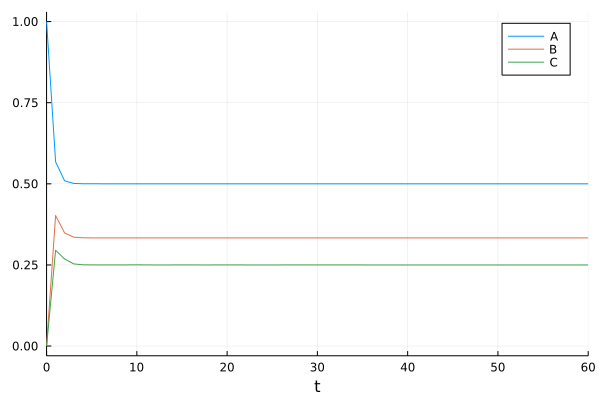

In [30]:
plot(sol)